In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [3]:
y = fish.Species
x = fish.drop('Species', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
knn = KNeighborsClassifier()
log = LogisticRegression()

In [10]:
y.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [12]:
x.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [8]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.525

In [11]:
log.fit(x_train, y_train)
log.score(x_test, y_test)

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.675

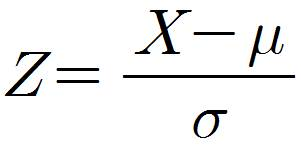

In [17]:
from IPython.display import Image
Image("standardization.jpg")

In [15]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [16]:
scale.fit(x_train)

StandardScaler()

In [19]:
scaled_x_train = scale.transform(x_train)
scaled_x_test = scale.transform(x_test)

In [20]:
knn = KNeighborsClassifier()
log = LogisticRegression()

In [21]:
knn.fit(scaled_x_train, y_train)
knn.score(scaled_x_test, y_test)

0.8

In [22]:
log.fit(scaled_x_train, y_train)
log.score(scaled_x_test, y_test)

0.8

In [ ]:
# knn : 가장 가까운 n개의 train data를 뽑아서 다수결로 예측..

In [24]:
preds = knn.predict(scaled_x_test)
preds

array(['Pike', 'Bream', 'Bream', 'Perch', 'Bream', 'Perch', 'Perch',
       'Perch', 'Bream', 'Parkki', 'Smelt', 'Smelt', 'Bream', 'Parkki',
       'Pike', 'Smelt', 'Perch', 'Pike', 'Roach', 'Perch', 'Parkki',
       'Bream', 'Parkki', 'Pike', 'Perch', 'Bream', 'Smelt', 'Perch',
       'Roach', 'Perch', 'Pike', 'Bream', 'Perch', 'Bream', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch'], dtype=object)

In [27]:
import numpy as np
np.mean(preds == y_test)

0.8

In [28]:
knn.predict_proba(scaled_x_test)

array([[0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0.2],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0.2, 0.4, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0.6, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0.4, 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0.2, 0. , 0.2,

In [34]:
knn.predict_proba(scaled_x_test).argmax(axis=1)

array([3, 0, 0, 2, 0, 2, 2, 2, 0, 1, 5, 5, 0, 1, 3, 5, 2, 3, 4, 2, 1, 0,
       1, 3, 2, 0, 5, 2, 4, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2], dtype=int64)

In [38]:
for index in knn.predict_proba(scaled_x_test).argmax(axis=1):
    print(knn.classes_[index], end=', ')

Pike, Bream, Bream, Perch, Bream, Perch, Perch, Perch, Bream, Parkki, Smelt, Smelt, Bream, Parkki, Pike, Smelt, Perch, Pike, Roach, Perch, Parkki, Bream, Parkki, Pike, Perch, Bream, Smelt, Perch, Roach, Perch, Pike, Bream, Perch, Bream, Perch, Perch, Perch, Perch, Perch, Perch, 

In [33]:
knn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [29]:
distances, indexes = knn.kneighbors(scaled_x_test)

In [31]:
indexes

array([[ 20,  34,  39,  38, 100],
       [ 35,  11,  15,  37, 111],
       [ 95,  60, 103,  37,  79],
       [ 18,  53,  57,  75,  30],
       [ 11,  35,  98,  37, 111],
       [ 40,  89,   7, 102, 118],
       [  8,  78,  52,   3,  14],
       [ 65,  96,  83,  53,   9],
       [104, 113,   6,  60,  72],
       [ 17,  50,  48,   4, 116],
       [ 10,  66,  46,  88, 109],
       [ 16,  21,  66,  46,  88],
       [104, 113,   6,  60,  72],
       [108,  82,  17, 106,  32],
       [ 20,  39,  34, 100,  42],
       [ 21,  16,  66,  10,  46],
       [ 50,  90, 116,  81,  94],
       [ 39,  42, 100,  70,  20],
       [ 61,   4,  48,  96, 107],
       [118,   7,   0,  40,  59],
       [108,  82,  17,  32, 106],
       [ 35,  11,  37, 111,  15],
       [108,  17,  82,  32,  99],
       [ 20,  34,  38,  39,  64],
       [ 43,  32,  33,  29,  54],
       [ 35,  11,  15,  37, 111],
       [ 66,  10,  46,  21,  88],
       [ 99,  45,  32,   9, 107],
       [110,  33,  49, 106,  97],
       [ 81,  

In [32]:
distances

array([[0.4783141 , 0.55498144, 0.68689609, 0.97565582, 1.0996389 ],
       [0.21160828, 0.29595332, 0.3030323 , 0.39474653, 0.49992658],
       [0.05743905, 0.29166717, 0.30400338, 0.314537  , 0.31772902],
       [0.21793508, 0.23815404, 0.24658754, 0.2712841 , 0.27912995],
       [0.28338478, 0.29965341, 0.46343724, 0.46382826, 0.56703636],
       [0.35110932, 0.41604939, 0.43281993, 0.57506186, 0.69513427],
       [0.03030736, 0.14136025, 0.18421651, 0.20278756, 0.27666367],
       [0.14303462, 0.15374744, 0.15895874, 0.16604804, 0.22395699],
       [0.16690251, 0.28516352, 0.39445237, 0.45975488, 0.57394804],
       [0.33526316, 0.4178377 , 0.47620008, 0.4858652 , 0.50612365],
       [0.08432239, 0.09585022, 0.1096794 , 0.12759411, 0.1295558 ],
       [0.11817462, 0.12825702, 0.27042624, 0.30354655, 0.31820671],
       [0.19013296, 0.30126838, 0.40734542, 0.46842027, 0.56895647],
       [0.31059042, 0.41683624, 0.48644128, 0.74437975, 0.74512133],
       [0.58624092, 0.62743766, 0.

In [ ]:
# LogisticRegression : sigmoid func을 사용해서 결과값을 0~1 사이로 전환.. 
# => 확률 : 
#     => binary cls, 0.5를 기준으로 0과 1로 분류
#     => multi cls, 각 target에 대해 확률값이 나오고, 확률이 가장 큰 y(target)를 예측 결과로 분류

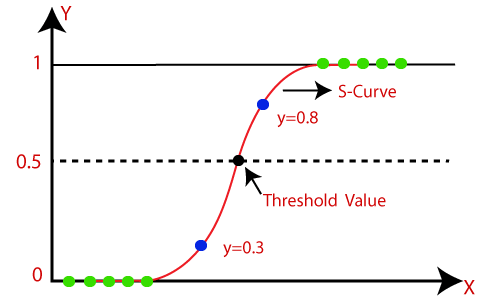

In [40]:
Image("logisticregression.png")

In [45]:
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 1)
x[:5]

array([-10,  -9,  -8,  -7,  -6])

In [46]:
y = 1 / (np.exp(-x) + 1)
y

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01])

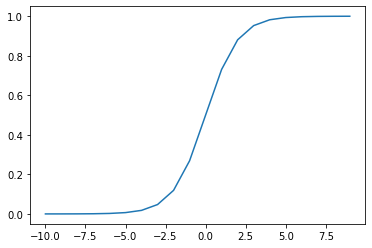

In [47]:
plt.plot(x,y)

In [48]:
log=LogisticRegression()
log.fit(scaled_x_train, y_train)
preds = log.predict(scaled_x_test)
preds

array(['Pike', 'Bream', 'Bream', 'Perch', 'Bream', 'Perch', 'Perch',
       'Perch', 'Bream', 'Parkki', 'Smelt', 'Smelt', 'Bream', 'Parkki',
       'Pike', 'Smelt', 'Parkki', 'Pike', 'Perch', 'Perch', 'Parkki',
       'Bream', 'Parkki', 'Pike', 'Perch', 'Bream', 'Smelt', 'Perch',
       'Perch', 'Perch', 'Pike', 'Bream', 'Smelt', 'Bream', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch'], dtype=object)

In [51]:
np.round(log.predict_proba(scaled_x_test), 2)  

array([[0.01, 0.  , 0.12, 0.81, 0.04, 0.  , 0.02],
       [0.88, 0.05, 0.02, 0.01, 0.02, 0.  , 0.03],
       [0.9 , 0.03, 0.02, 0.01, 0.01, 0.  , 0.04],
       [0.  , 0.03, 0.74, 0.01, 0.18, 0.01, 0.02],
       [0.82, 0.06, 0.05, 0.  , 0.03, 0.  , 0.05],
       [0.17, 0.  , 0.58, 0.06, 0.01, 0.  , 0.18],
       [0.02, 0.03, 0.71, 0.04, 0.15, 0.  , 0.04],
       [0.01, 0.07, 0.61, 0.01, 0.25, 0.02, 0.03],
       [0.94, 0.01, 0.01, 0.  , 0.  , 0.  , 0.03],
       [0.05, 0.32, 0.23, 0.01, 0.29, 0.08, 0.03],
       [0.  , 0.02, 0.1 , 0.  , 0.06, 0.81, 0.  ],
       [0.  , 0.02, 0.06, 0.  , 0.04, 0.89, 0.  ],
       [0.94, 0.01, 0.01, 0.  , 0.  , 0.  , 0.03],
       [0.22, 0.38, 0.12, 0.01, 0.22, 0.01, 0.04],
       [0.02, 0.  , 0.29, 0.6 , 0.05, 0.  , 0.04],
       [0.  , 0.02, 0.1 , 0.  , 0.05, 0.83, 0.  ],
       [0.02, 0.34, 0.19, 0.  , 0.25, 0.18, 0.02],
       [0.  , 0.  , 0.07, 0.9 , 0.01, 0.  , 0.01],
       [0.01, 0.08, 0.53, 0.02, 0.29, 0.04, 0.02],
       [0.06, 0.  , 0.79, 0.02,

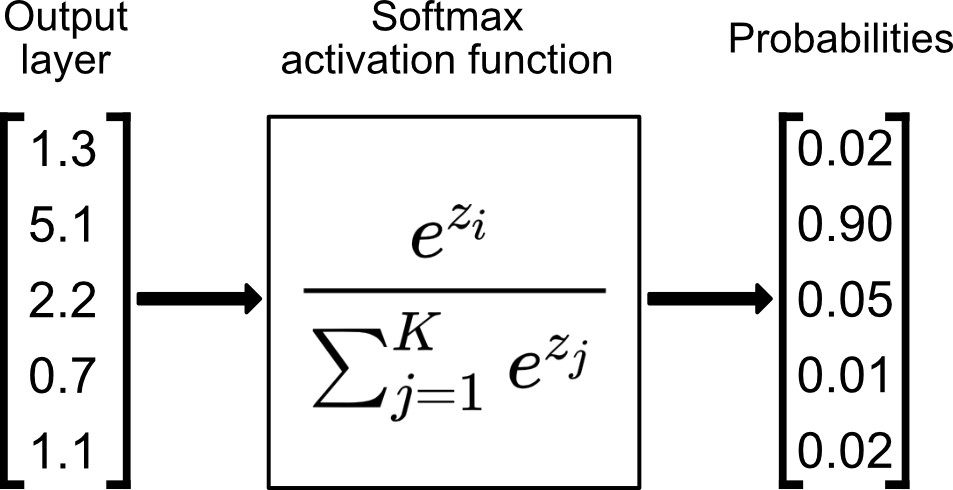

In [55]:
Image('softmax.jpeg')

In [54]:
# softmax 
log.predict_proba(scaled_x_test).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [52]:
np.round(log.predict_proba(scaled_x_test), 2).argmax(axis=1)

array([3, 0, 0, 2, 0, 2, 2, 2, 0, 1, 5, 5, 0, 1, 3, 5, 1, 3, 2, 2, 1, 0,
       1, 3, 2, 0, 5, 2, 2, 2, 3, 0, 5, 0, 2, 2, 2, 2, 2, 2], dtype=int64)

In [56]:
np.round(log.predict_proba(scaled_x_test), 2)[:5]

array([[0.01, 0.  , 0.12, 0.81, 0.04, 0.  , 0.02],
       [0.88, 0.05, 0.02, 0.01, 0.02, 0.  , 0.03],
       [0.9 , 0.03, 0.02, 0.01, 0.01, 0.  , 0.04],
       [0.  , 0.03, 0.74, 0.01, 0.18, 0.01, 0.02],
       [0.82, 0.06, 0.05, 0.  , 0.03, 0.  , 0.05]])

In [60]:
np.round(log.decision_function(scaled_x_test), 2).argmax(axis=1)

array([3, 0, 0, 2, 0, 2, 2, 2, 0, 1, 5, 5, 0, 1, 3, 5, 1, 3, 2, 2, 1, 0,
       1, 3, 2, 0, 5, 2, 2, 2, 3, 0, 5, 0, 2, 2, 2, 2, 2, 2], dtype=int64)

In [63]:
from scipy.special import softmax
proba = softmax(log.decision_function(scaled_x_test), axis=1)
np.round(proba,2)[:5]

array([[0.01, 0.  , 0.12, 0.81, 0.04, 0.  , 0.02],
       [0.88, 0.05, 0.02, 0.01, 0.02, 0.  , 0.03],
       [0.9 , 0.03, 0.02, 0.01, 0.01, 0.  , 0.04],
       [0.  , 0.03, 0.74, 0.01, 0.18, 0.01, 0.02],
       [0.82, 0.06, 0.05, 0.  , 0.03, 0.  , 0.05]])

In [ ]:
'''
ray([[0.01, 0.  , 0.12, 0.81, 0.04, 0.  , 0.02],
       [0.88, 0.05, 0.02, 0.01, 0.02, 0.  , 0.03],
       [0.9 , 0.03, 0.02, 0.01, 0.01, 0.  , 0.04],
       [0.  , 0.03, 0.74, 0.01, 0.18, 0.01, 0.02],
       [0.82, 0.06, 0.05, 0.  , 0.03, 0.  , 0.05],
       [0.17, 0.  , 0.58, 0.06, 0.01, 0.  , 0.18],
      '''

In [ ]:
# 경사하강법

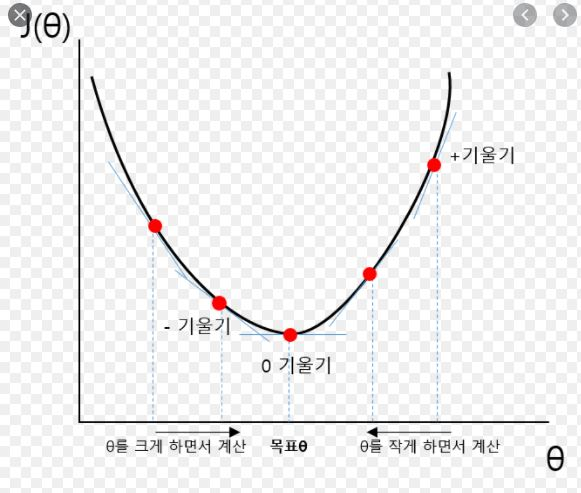

In [1]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("gradientdescent.JPG")


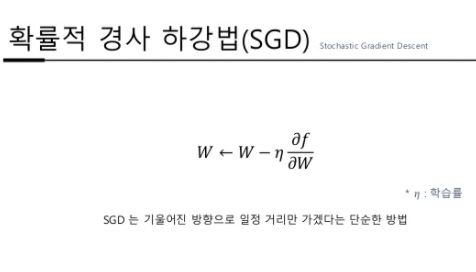

In [2]:
Image("gradientdescent1.JPG")

In [3]:
# SGDClassifier

In [4]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [5]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [7]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [6]:
y = fish.Species
x = fish.drop('Species', axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=11)

In [13]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [14]:
scale.fit(x_train)

StandardScaler()

In [15]:
scaled_x_train = scale.transform(x_train)
scaled_x_test = scale.transform(x_test)

In [17]:
scaled_x_train[:5]

array([[-1.08439086, -1.5823055 , -1.59367269, -1.6338778 , -1.95853435],
       [-1.05783398, -1.34913832, -1.41269227, -1.47669913, -1.4742879 ],
       [ 0.25714183,  0.25505184,  0.41434811,  1.12021966, -0.05208439],
       [-0.96118887, -1.31183157, -1.30065678, -0.52854611, -1.31400567],
       [ 0.80470619,  0.39495215,  0.5780923 ,  1.38290769,  0.51499206]])

In [42]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter=10, random_state=42)
# loss = -y*log(y_hat) + (1-y)log(1-y_hat)

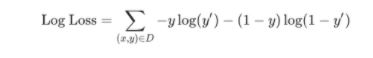

In [27]:
Image("logloss.JPG")

In [44]:
sc.fit(scaled_x_train, y_train)

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [35]:
sc.score(scaled_x_test, y_test)

0.84375

In [36]:
sc.partial_fit(scaled_x_train, y_train)
sc.score(scaled_x_train, y_train)

0.7401574803149606

In [60]:
sc = SGDClassifier(loss = 'log', max_iter=10, random_state=42)
sc.fit(scaled_x_train, y_train)

train_score_list = []
test_score_list = []

for _ in range(500):
    sc.partial_fit(scaled_x_train, y_train)
    train_score = sc.score(scaled_x_train, y_train)
    test_score = sc.score(scaled_x_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


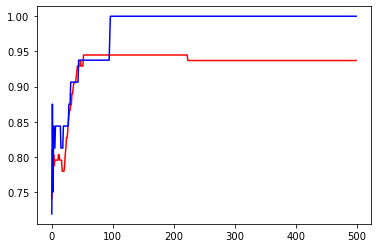

In [61]:
import matplotlib.pyplot as plt
plt.plot(train_score_list, c='r')
plt.plot(test_score_list, c='b')